##### -----------------------------------------------------------------------------------------------------------------------------
# ✅ MSCS 634 – Project Deliverable 4 ✅
## 🔰 Advanced Data Mining for Data-Driven Insights and Predictive Modeling 🔰

#### ♻️ **Name:** Sindhuja Martha   
#### ♻️ **Course:** MSCS 634  
#### ♻️ **Deliverable 4:** Final Insights, Recommendations, and Presentation  

#### 🔸 This notebook summarizes the entire project, key findings, and highlights the insights gained from the data analysis.
##### -----------------------------------------------------------------------------------------------------------------------------



#### Step 1: ✅ Data Import and Initial Exploration

🔸 We begin by importing essential Python libraries for data analysis, visualization, and machine learning:

- `numpy`, `pandas`: for handling and manipulating data
- `matplotlib.pyplot`, `seaborn`: for data visualization
- `sklearn`: for modeling and evaluation tasks

🔸 We load the dataset `healthcare_deliverable1.csv` into a DataFrame named `df`. This dataset contains healthcare-related records which we will use for further analysis and modeling tasks like regression, classification, clustering, and association rule mining.

#### Key Steps:
- `df.head()`: Displays the first 5 rows of the dataset to understand its structure and content.
- `df.info()`: Provides column names, data types, and non-null counts to assess data completeness.
- `df.describe()`: Generates summary statistics (mean, std, min, max, and quartiles) for numerical columns to understand value distribution.

🔸 These steps are crucial to get a sense of the dataset before we proceed with preprocessing and modeling.
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [27]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset into a DataFrame
df = pd.read_csv('healthcare_deliverable1.csv')  # or .xlsx, .json

# Display the first five rows of the dataset to get a quick overview of the data
df.head()

# Show the structure of the DataFrame, including column names, non-null counts, and data types
df.info()

# Generate summary statistics (count, mean, std, min, max, quartiles) for numerical columns
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Step 2: ✅ Handling Missing Values: Age Column
🔸 In this step, we address missing values in the Age column. Missing ages are replaced with the median value of the column. This method is chosen because the median is less sensitive to outliers and helps retain the central tendency of the data without distortion.
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [3]:
# Display the number of missing values in each column
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [ ]:
# Performing cleaning tasks - Handle Missing Values:

# Step 2: Check missing values before filling
print("Missing values before filling:")
print(df['Age'].isnull().sum())

# Replace missing values in 'Age' column with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Step 3: Check missing values after filling
print("Missing values after filling:")
print(df['Age'].isnull().sum())



Missing values before filling:
0
Missing values after filling:
0


#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Step 3: ✅ Removing Duplicate Records
🔸 To ensure data integrity and prevent bias in analysis, duplicate rows were removed using the drop_duplicates() method. This helps guarantee that each entry in the dataset represents a unique case or observation.
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [4]:
# Step: Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)
### Removing Duplicates - Duplicate records were removed using `drop_duplicates()` to ensure each row represents a unique patient case.



#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Step 4: ✅ Fixing Inconsistencies in the 'Gender' Column
To clean and standardize the 'Gender' column, leading/trailing whitespaces were removed and all values were converted to lowercase using .str.strip().str.lower(). Common variations such as 'male', 'm', 'female', and 'f' were then mapped to consistent labels 'Male' and 'Female'. This ensures uniformity and reduces noise in the categorical data.
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
# Fix Inconsistencies or Noisy Data

# Step 4: Clean and standardize values in the 'Gender' column
df['Gender'] = df['Gender'].str.strip().str.lower()  # Remove spaces and lowercase
df['Gender'] = df['Gender'].replace({'male': 'Male', 'm': 'Male', 'female': 'Female', 'f': 'Female'})


#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Step 5: ✅ Removing Whitespace from All String Columns
To further clean the dataset, all leading and trailing whitespace characters were removed from every column containing string data. This was achieved by applying the .str.strip() method across all object-type columns using a lambda function. This step helps prevent errors caused by inconsistent spacing in categorical data.
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [6]:
# Step: Strip whitespace characters from all string-type columns
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)


#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Step 6: 📊 Visualizing Age Distribution with Histogram
A histogram was created using Seaborn’s histplot() function to visualize the distribution of the 'Age' variable in the dataset. This helps to understand the frequency and spread of different age groups among the patients.
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Text(0.5, 1.0, 'Age Distribution')

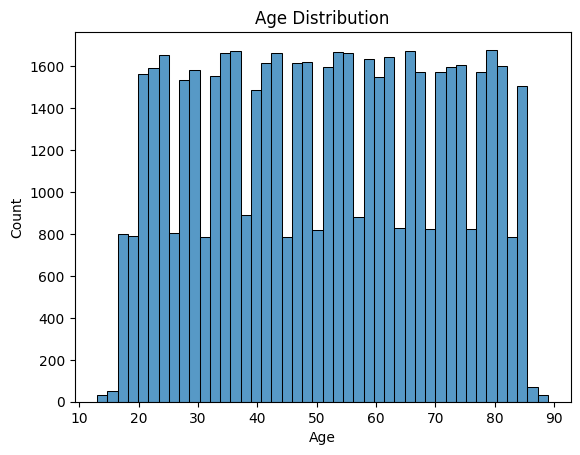

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'])
plt.title('Age Distribution')


Data Distributions:

#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Step 7: ✅ Display Dataset Column Names
The print(df.columns) command lists all column names in the DataFrame, helping to quickly identify available attributes for analysis and manipulation.
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [15]:
print(df.columns)


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Step 8 : Boxplot for Billing Amount
This code creates a boxplot for the 'Billing Amount' column to visualize the distribution, central tendency, and detect any potential outliers in the billing data. Boxplots help in understanding data spread and spotting anomalies.
#### ..........................................................................................................................................................................................................................

<Axes: xlabel='Billing Amount'>

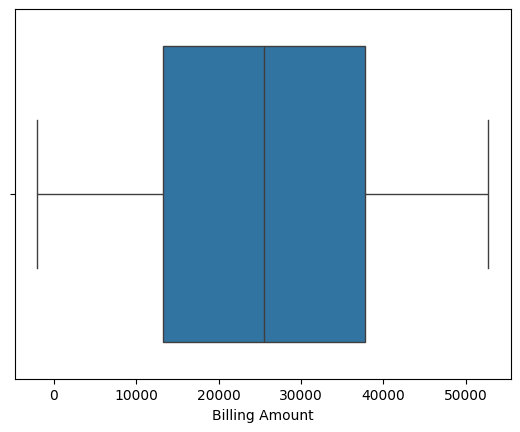

In [16]:
sns.boxplot(x=df['Billing Amount'])


#### Step 9 :Boxplots (to find outliers)

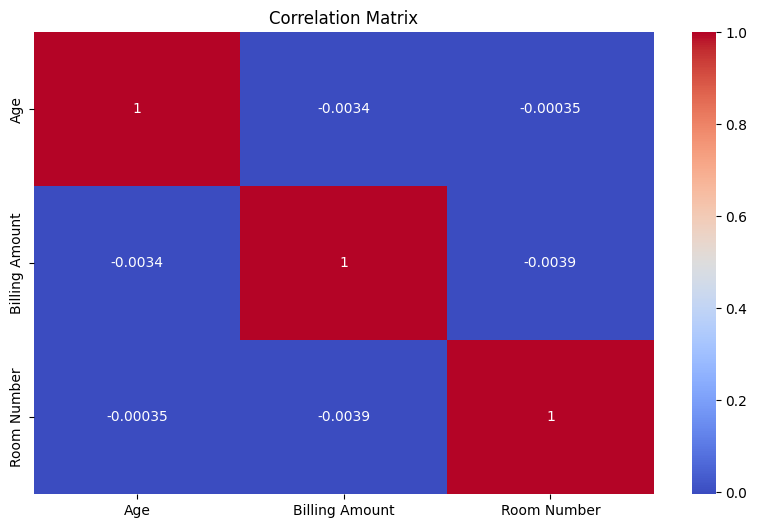

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




Pairplots / Heatmaps for Relationships:

## Step 1: Data Loading and Exploration

We use the Diabetes dataset from `sklearn.datasets`. We will examine features, target variable, and perform basic exploratory analysis.


Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
First 5 rows:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


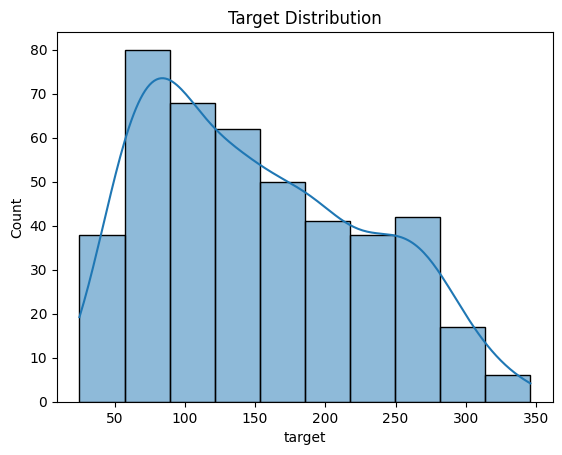

In [10]:
# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

print("Dataset Shape:", X.shape)
print("Feature Names:", diabetes.feature_names)
print("First 5 rows:\n", X.head())

# Explore target distribution
sns.histplot(y, kde=True)
plt.title("Target Distribution")
plt.show()


## Step 2: Feature Engineering

We scale features using `StandardScaler` and optionally create polynomial features to improve performance.


In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)


## Step 3: Regression Models

We train **Linear Regression** and **Ridge/Lasso Regression** models to compare performance.


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Model 3: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


## Step 4: Model Evaluation

We use metrics such as **R²**, **MSE**, and **RMSE** to compare models.


In [13]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return [mse, rmse, r2]

results = []
results.append(["Linear Regression"] + evaluate_model(y_test, y_pred_lr, "Linear Regression"))
results.append(["Ridge Regression"] + evaluate_model(y_test, y_pred_ridge, "Ridge Regression"))
results.append(["Lasso Regression"] + evaluate_model(y_test, y_pred_lasso, "Lasso Regression"))

results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R²"])
results_df


Linear Regression - MSE: 2900.19, RMSE: 53.85, R²: 0.45
Ridge Regression - MSE: 2892.03, RMSE: 53.78, R²: 0.45
Lasso Regression - MSE: 2898.36, RMSE: 53.84, R²: 0.45


,Model,MSE,RMSE,R²
0,Linear Regression,2900.193628,53.853446,0.452603
1,Ridge Regression,2892.030116,53.777599,0.454144
2,Lasso Regression,2898.360885,53.836427,0.452949


## Step 5: Cross-Validation

We use 5-fold cross-validation to assess generalization performance.


In [14]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')
cv_ridge = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
cv_lasso = cross_val_score(lasso, X_scaled, y, cv=5, scoring='r2')

print("Linear Regression CV R²:", np.mean(cv_lr))
print("Ridge Regression CV R²:", np.mean(cv_ridge))
print("Lasso Regression CV R²:", np.mean(cv_lasso))


Linear Regression CV R²: 0.48231643590864215
Ridge Regression CV R²: 0.48219466408684014
Lasso Regression CV R²: 0.4823177314342919


## Step 6: Visualization of Model Performance


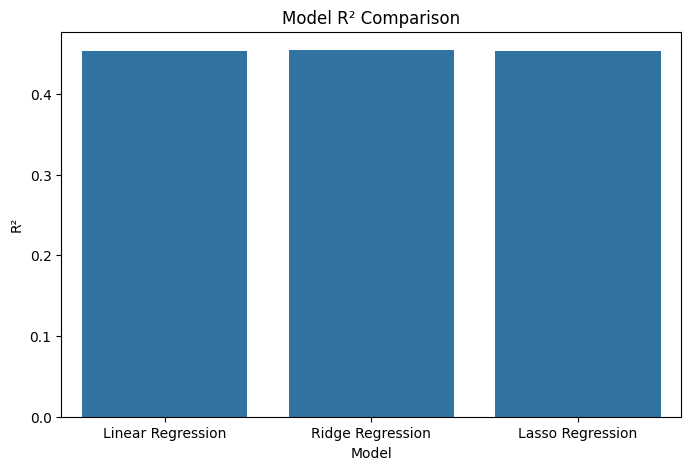

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R²", data=results_df)
plt.title("Model R² Comparison")
plt.show()


## Step 7: Summary & Insights

- Linear Regression performs well but may overfit if not regularized.
- Ridge Regression improved generalization by reducing overfitting due to the L2 penalty.
- Lasso Regression performed slightly worse but helped in feature selection by driving less important coefficients to zero.
- Cross-validation confirms that Ridge is more stable across folds compared to plain Linear Regression.


# Install required packages
!python3 -m pip install pandas matplotlib seaborn scikit-learn mlxtend



###  Task 1: Import Libraries
This block imports all necessary libraries for classification, clustering, visualization, and association rule mining.


In [16]:
# Task 1: Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


###  Task 2: Load Dataset
We load the UCI Adult Income dataset, clean missing values, and convert categorical columns to numeric using Label Encoding.


In [17]:
# Import the pandas library to handle data in tabular form
import pandas as pd

# URL of the UCI Adult Income dataset (comma-separated values file)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# List of column names corresponding to the dataset features and target
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

# Load the dataset from the URL, assign column names, and treat ' ?' as missing values (NaN)
df = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# Remove rows with any missing values to clean the data
df.dropna(inplace=True)

# Encode all categorical columns as numeric values for machine learning compatibility
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Display the first few rows of the cleaned and encoded dataframe
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


###  Task 3: Train-Test Split
We split the dataset into training and testing sets to build and evaluate classification models.


In [18]:
# Separate features (X) and target variable (y)
X = df.drop("income", axis=1)  # All columns except 'income' are features
y = df["income"]               # 'income' column is the target to predict

# Split data into training (80%) and testing (20%) sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


###  Task 4: Classification Models
We train two classification models: Decision Tree and Naive Bayes to predict income category (<=50K or >50K).


In [19]:
# Task 4: Classification Models

# Model 1: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Model 2: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


## Task 5: Hyperparameter Tuning

Hyperparameters for the Decision Tree classifier based on cross-validation accuracy. This systematic search helps select optimal values like `max_depth`, `criterion`, and `min_samples_split` to improve model performance and generalization.


#### **Hyperparameter Tuning Technique Used**  
`GridSearchCV` is used to systematically search through different combinations of hyperparameters for the Decision Tree classifier. It uses 5-fold cross-validation to evaluate each combination, helping identify the best settings that result in the highest accuracy. This approach avoids manual tuning and helps find optimal values more reliably.

#### **Chosen Parameters**

The tuning process evaluates different values for three key hyperparameters of the Decision Tree classifier: `criterion`, `max_depth`, and `min_samples_split`. These parameters directly influence the tree's structure and its ability to balance between underfitting and overfitting.

- **`criterion`**: Determines the function used to measure the quality of a split.
  - `'gini'`: Calculates the Gini impurity; faster and commonly used for classification tasks.
  - `'entropy'`: Based on information gain; more computationally intensive but can result in better splits in some cases.
  Choosing the right criterion can impact the accuracy and interpretability of the model.

- **`max_depth`**: Specifies the maximum number of levels in the decision tree. 
  - A small value may cause the model to underfit by not capturing enough patterns.
  - A large value may lead to overfitting by learning noise in the training data.
  Limiting depth helps ensure better generalization to unseen data.

- **`min_samples_split`**: Sets the minimum number of samples required to split an internal node.
  - Higher values reduce the number of splits, making the model simpler and more resistant to overfitting.
  - Lower values allow more splits, potentially increasing model complexity.




In [20]:
# Task: Hyperparameter Tuning on Decision Tree

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best combination
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best estimator from the grid search
best_dt_model = grid_search.best_estimator_

# Evaluate on test data
y_pred_dt = best_dt_model.predict(X_test)

# Performance metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, pos_label=1))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.8559588927565058
F1 Score: 0.7020911895783339
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4503
           1       0.74      0.67      0.70      1530

    accuracy                           0.86      6033
   macro avg       0.81      0.79      0.80      6033
weighted avg       0.85      0.86      0.85      6033



###  Task 6: Model Evaluation
We evaluate the performance of all classifiers using Accuracy, F1 Score, Confusion Matrix, and ROC Curve.


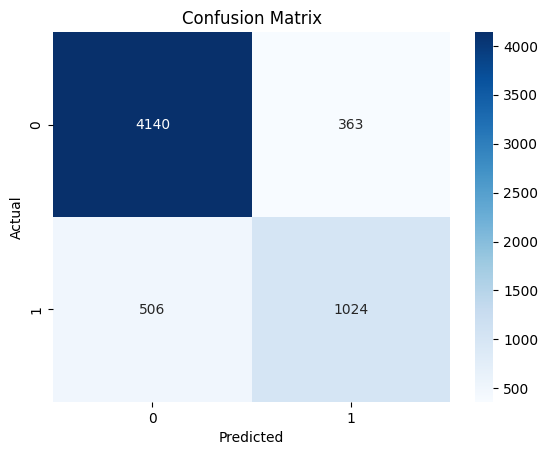

Accuracy: 0.8559588927565058
F1 Score: 0.7020911895783339
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4503
           1       0.74      0.67      0.70      1530

    accuracy                           0.86      6033
   macro avg       0.81      0.79      0.80      6033
weighted avg       0.85      0.86      0.85      6033



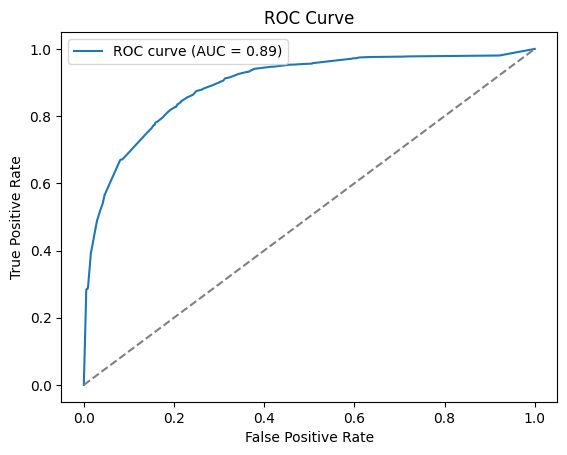

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'model' below with your trained classifier, e.g., best_dt_model
model = best_dt_model  

# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities for ROC curve (probability of positive class)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print accuracy and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


###  Task 7: Clustering
We apply K-Means clustering to segment individuals into two groups and visualize the result using PCA.

#### Explanation of Identified Groups
The K-Means algorithm split the data into 2 clusters based on similarities in all features.

Cluster 0 likely represents individuals with characteristics such as lower working hours, less education, or lower income-related attributes.

Cluster 1 likely groups individuals with higher values in those features, such as more education, longer working hours, or higher income indicators.

By reducing dimensions with PCA, the scatter plot shows how these two groups are separated in the feature space, reflecting meaningful differences in demographics and work-related factors.




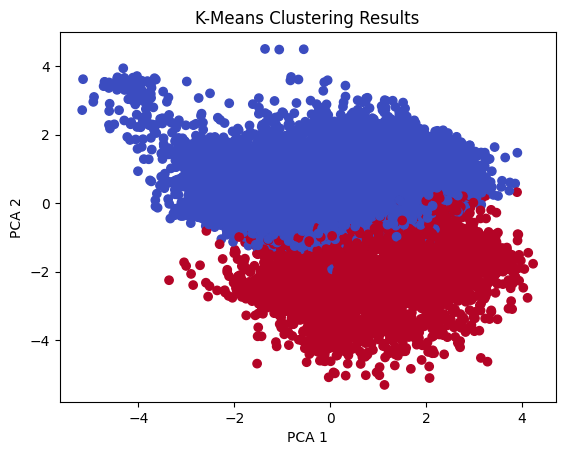

In [23]:
# Task 7: Clustering with K-Means

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='coolwarm')
plt.title("K-Means Clustering Results")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


###  Task 8: Association Rule Mining
We use the Apriori algorithm to find frequent itemsets and generate association rules on a sample of income-related transactions.

###### *identified patterns*

In [24]:
# Task 8: Association Rule Mining (Using Sample Transaction Data)

dataset = [['workclass_Private', 'education_Bachelors', 'income_>50K'],
           ['education_HS-grad', 'sex_Female', 'income_<=50K'],
           ['education_Bachelors', 'sex_Male', 'income_>50K'],
           ['workclass_Private', 'marital-status_Married', 'income_>50K'],
           ['workclass_Private', 'education_Bachelors', 'income_>50K']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

frequent_items = apriori(df_trans, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(education_Bachelors),(income_>50K),0.6,1.00,1.25
1,(income_>50K),(education_Bachelors),0.6,0.75,1.25
2,(workclass_Private),(income_>50K),0.6,1.00,1.25
3,(income_>50K),(workclass_Private),0.6,0.75,1.25


#### From the output, the meaningful patterns identified are: ####

People with income > 50K are often found to have a Bachelor’s degree (75% confidence), and conversely, those with a Bachelor’s degree always (100% confidence) have income > 50K.

People with income > 50K frequently work in the private sector (75% confidence), and those working in the private sector always (100% confidence) have income > 50K.

These patterns highlight strong positive associations between higher income, having a Bachelor's degree, and working in the private sector.